In [1]:
# coding: utf8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

from mydatools.plot import plot_classifier_paras

%matplotlib inline

## Logistic Regression 极大似然估计解释

$\hat{y}$是给定$x$对$y=1$的估计:
$\hat{y} = P(y=1|x)$
所以，$1-\hat{y} = P(y=0|x)$

归纳起来，$P(y|x)=\hat{y}^y (1-\hat{y})^{1-y}$
则$log(P(y|x))=y*log(\hat{y})+(1-y)*log(1-\hat{y})$

那对于所有的样本，用极大似然估计：
$L=\prod P(y^{(i)}|x^{(i)})$
取对数似然，
$l=log(\prod P(y^{(i)}|x^{(i)}))=\sum y*log(\hat{y})+(1-y)*log(1-\hat{y})$

由于要最大化$l$，那我们的损失函数要加上负号，
$J=-\sum y*log(\hat{y})+(1-y)*log(1-\hat{y})$

## 求导

$z = Wx + b$

$\hat{y} = \sigma(z) = \sigma(Wx + b)$

$J = -y \bullet log(\hat{y}) - (1-y) \bullet log(1-\hat{y})$

$\frac{\partial J}{\partial \hat{y}} = \frac{\hat{y} - y}{\hat{y}(1-\hat{y})}$

$\frac{\partial \hat{y}}{\partial z} = \hat{y}(1-\hat{y})$

$\frac{\partial J}{\partial z} = \frac{\partial J}{\partial \hat{y}} \bullet \frac{\partial \hat{y}}{\partial z} = \hat{y} - y$

$\frac{\partial J}{\partial W} = \frac{\partial J}{\partial z} \bullet \frac{\partial z}{\partial W} = (\hat{y} - y)x$

$\frac{\partial J}{\partial b} = \frac{\partial J}{\partial z} \bullet \frac{\partial z}{\partial b} = \hat{y} - y$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class logistic_regression():
    def __init__(self, lr=0.1, epoches=100):
        self.lr = lr
        self.epoches = epoches
    
    def _init_parameters(self, n):
        self.W = np.zeros([n, 1])
        self.b = 0

    def _calc_yhat(self, X):
        y_hat = sigmoid(X.dot(self.W) + self.b)
        return y_hat
        
    def _update_parameters(self, X, y):
        m = X.shape[0]
        y_hat = self._calc_yhat(X)
        dW = X.T.dot(y_hat - y) / m
        db = np.sum(y_hat - y) / m
        self.W -= self.lr * dW
        self.b -= self.lr * db
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        m = X.shape[0] # 样本数
        n = X.shape[1] # 特征数

        # 初始化W, b
        self._init_parameters(n)
        
        # SGD
        for epoch in range(self.epoches):
            self._update_parameters(X, y)

    def predict(self, X):
        y_hat = self._calc_yhat(X)
        res = np.where(y_hat[:, 0] >= 0.5, 1, 0)
        return res

### 测试

y_pred: [1 0 1]


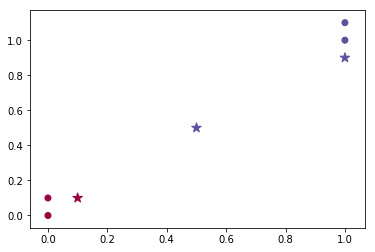

In [3]:
X_train = np.array([[1.0, 1.1], [1.0, 1.0], [0.0, 0.1],[0.0, 0.0]])
y_train = np.array([1,1,0,0])
X_pred = np.array([[1.0,0.9], [0.1,0.1], [0.5,0.5]])

model = logistic_regression()
model.fit(X_train, y_train)
y_pred = model.predict(X_pred)
print('y_pred:', y_pred)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred, cmap=plt.cm.Spectral, s=100, marker='*')

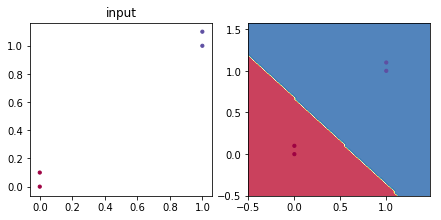

In [4]:
plot_classifier_paras(logistic_regression, X_train, y_train)

### 月亮数据集

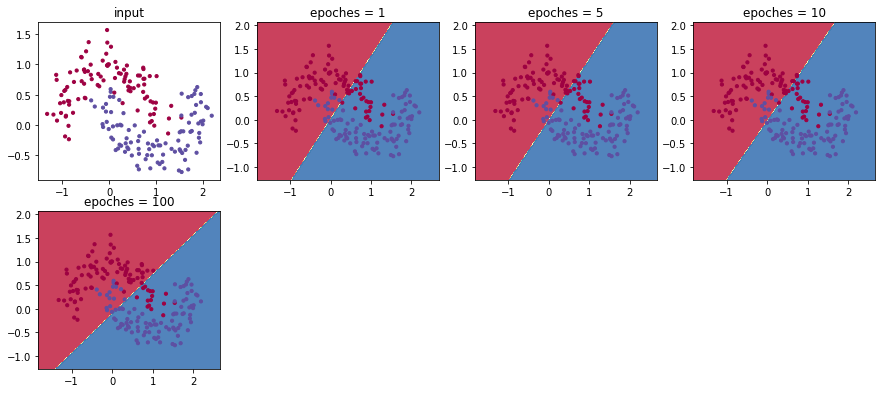

In [5]:
X_train, y_train = datasets.make_moons(200, noise=0.20)
plot_classifier_paras(logistic_regression, X_train, y_train, {'epoches': [1, 5, 10, 100]})

### 容易线性区分数据集

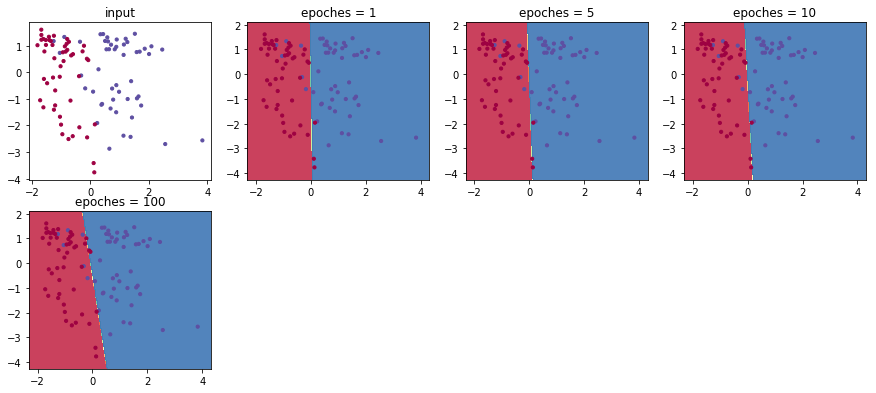

In [6]:
X_train, y_train = datasets.make_classification(n_features=2, n_informative=2, n_redundant=0)
plot_classifier_paras(logistic_regression, X_train, y_train, {'epoches': [1, 5, 10, 100]})